In [1]:
import random
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import warnings
warnings.filterwarnings('ignore')

InteractiveShell.ast_node_interactivity = "all"  # "last_expr"


%pylab inline
%matplotlib inline

np.random.seed(1)
np.set_printoptions(suppress=True, formatter={'float_kind': '{:0.5f}'.format})

# %%writefile template.py#
# %load template.py - внешний файл
# %lsmagic

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn.metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection
from sklearn.svm import LinearSVC, SVC
# from plotting_utils import plot_class_regions_for_classifier_subplot

In [3]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [4]:
def plot_with_support_vectors(clf, X, y, plot_support=False):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='winter')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [5]:
from sklearn.metrics import accuracy_score, f1_score, r2_score


def plot_svc_with_errors(clf, X, Y):
    plot_with_support_vectors(clf, X, Y)
    print("------------------------------")
    print("accuracy_score : %s" % accuracy_score(clf.predict(X), Y))
    print("f1_score       : %s" % f1_score(clf.predict(X), Y))
    print("r2_score       : %s" % r2_score(clf.predict(X), Y))
    print("smape          : %s" % smape(clf.predict(X), Y))
    print("------------------------------")

In [6]:
df1 = pd.read_csv('chips.csv', header=0, sep=',')
df2 = pd.read_csv('geyser.csv', header=0, sep=',')

X1 = df1.drop(['class'], axis=1).values
Y1 = df1['class'].replace({"P": 1, "N": 0})

X2 = df2.drop(['class'], axis=1).values
Y2 = df2['class'].replace({"P": 1, "N": 0})

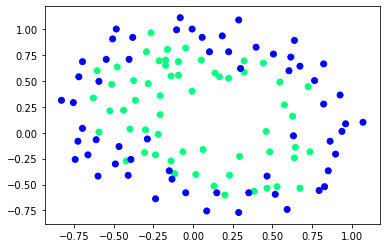

In [7]:
plt.scatter(X1[:, 0], X1[:, 1], c=Y1, cmap='winter')

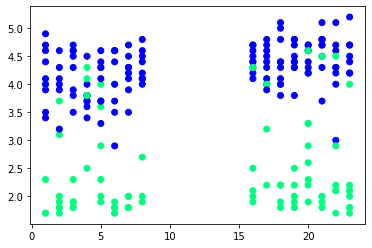

In [8]:
plt.scatter(X2[:, 0], X2[:, 1], c=Y2, cmap='winter')

# Linear
$K(x_{i}, x_{j}) =  \left \langle x_{i}, x_{j}\right \rangle$

In [9]:
grid_param = {
    "C": np.arange(0, 4, 0.2),
    "kernel": ["linear"]
}
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='macro') #weighted
grid_cv = model_selection.GridSearchCV(
    SVC(),
    grid_param,
    n_jobs=-1,
    scoring=scorer,
    cv=LeaveOneOut())

0.5
{'C': 1.0, 'kernel': 'linear'}


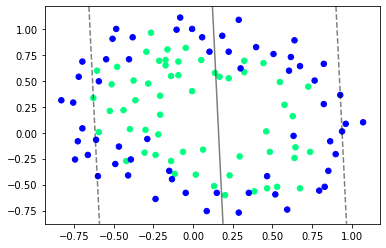

------------------------------
accuracy_score : 0.5508474576271186
f1_score       : 0.5826771653543308
r2_score       : -0.8497485950902097
smape          : 89.83050847457626
------------------------------
CPU times: user 2.63 s, sys: 425 ms, total: 3.05 s
Wall time: 3.83 s


In [10]:
%%time
grid_cv.fit(X1, Y1)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X1, Y1)

0.9054054054054054
{'C': 0.2, 'kernel': 'linear'}


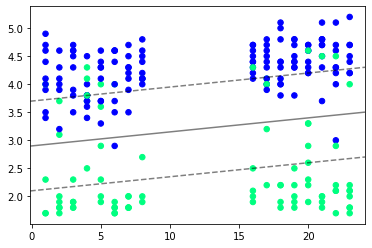

------------------------------
accuracy_score : 0.9054054054054054
f1_score       : 0.8679245283018867
r2_score       : 0.5651525044305569
smape          : 18.91891891891892
------------------------------
CPU times: user 4.05 s, sys: 140 ms, total: 4.19 s
Wall time: 5.15 s


In [11]:
%%time
grid_cv.fit(X2, Y2)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X2, Y2)

## Linear 2

In [12]:
grid_param = {
    "C": np.arange(0, 4, 0.2),
    "penalty": ["l1", "l2"],
    "loss" : ["squared_hinge", "hinge"],
}
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='macro')  # weighted
grid_cv = model_selection.GridSearchCV(
    LinearSVC(),
    grid_param,
    n_jobs=-1,
    scoring=scorer,
    cv=LeaveOneOut())

0.5
{'C': 1.0, 'loss': 'hinge', 'penalty': 'l2'}


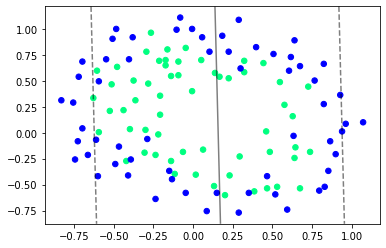

------------------------------
accuracy_score : 0.5508474576271186
f1_score       : 0.5826771653543308
r2_score       : -0.8497485950902097
smape          : 89.83050847457626
------------------------------
CPU times: user 5.94 s, sys: 161 ms, total: 6.1 s
Wall time: 6.09 s


In [13]:
%%time
grid_cv.fit(X1, Y1)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X1, Y1)

0.9054054054054054
{'C': 0.2, 'loss': 'squared_hinge', 'penalty': 'l2'}


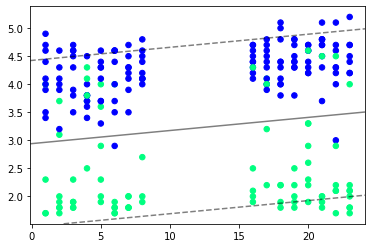

------------------------------
accuracy_score : 0.9054054054054054
f1_score       : 0.8679245283018867
r2_score       : 0.5651525044305569
smape          : 18.91891891891892
------------------------------
CPU times: user 11.1 s, sys: 160 ms, total: 11.3 s
Wall time: 18 s


In [14]:
%%time
grid_cv.fit(X2, Y2)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X2, Y2)

# Polynomial
$K(x_{i}, x_{j}) =   (\gamma \left \langle x_{i}, x_{j}\right \rangle + r)^{d}$

In [15]:
grid_param = {
    "C": np.arange(0, 5, 0.2),
    "kernel": ["poly"],
    "degree": np.arange(1, 5), #d
    "coef0": np.arange(-0.5, 0.5, 0.1), #r
}
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='macro') #weighted
grid_cv = model_selection.GridSearchCV(
    SVC(),
    grid_param,
    n_jobs=-1,
    scoring=scorer,
    cv=LeaveOneOut())

0.8305084745762712
{'C': 0.4, 'coef0': 0.3999999999999998, 'degree': 2, 'kernel': 'poly'}


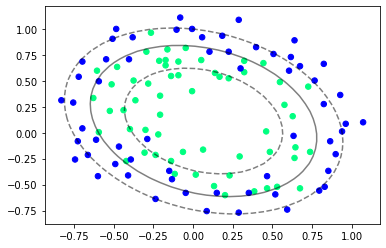

------------------------------
accuracy_score : 0.847457627118644
f1_score       : 0.8548387096774194
r2_score       : 0.38111888111888115
smape          : 30.508474576271183
------------------------------
CPU times: user 1min 24s, sys: 1.18 s, total: 1min 25s
Wall time: 1min 31s


In [16]:
%%time
grid_cv.fit(X1, Y1)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X1, Y1)

0.9099099099099099
{'C': 1.2000000000000002, 'coef0': 0.19999999999999984, 'degree': 2, 'kernel': 'poly'}


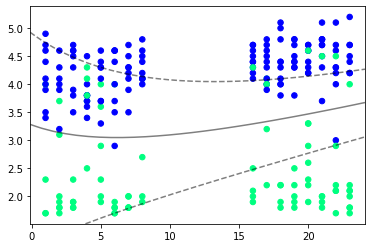

------------------------------
accuracy_score : 0.9099099099099099
f1_score       : 0.875
r2_score       : 0.5888888888888888
smape          : 18.01801801801802
------------------------------
CPU times: user 2min 39s, sys: 1.72 s, total: 2min 41s
Wall time: 3min 14s


In [17]:
%%time
grid_cv.fit(X2, Y2)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X2, Y2)

# RBF
$K(x_{i}, x_{j}) =  e^{-\gamma \left \|x_{i} - x_{j}  \right \|^{2}}$

In [18]:
grid_param = {
    "C": np.arange(0, 5, 0.2),
    "kernel": ["rbf"]
}
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='macro') #weighted
grid_cv = model_selection.GridSearchCV(
    SVC(),
    grid_param,
    n_jobs=-1,
    scoring=scorer,
    cv=LeaveOneOut())

0.8389830508474576
{'C': 4.6000000000000005, 'kernel': 'rbf'}


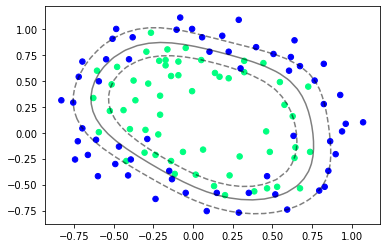

------------------------------
accuracy_score : 0.847457627118644
f1_score       : 0.8500000000000001
r2_score       : 0.38824884792626724
smape          : 30.508474576271183
------------------------------
CPU times: user 2.67 s, sys: 109 ms, total: 2.78 s
Wall time: 2.59 s


In [19]:
%%time
grid_cv.fit(X1, Y1)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X1, Y1)

0.8963963963963963
{'C': 1.4000000000000001, 'kernel': 'rbf'}


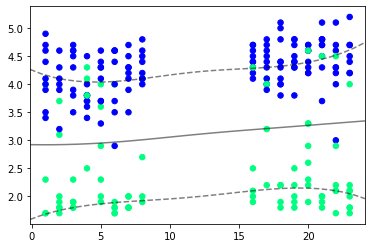

------------------------------
accuracy_score : 0.8963963963963963
f1_score       : 0.8535031847133757
r2_score       : 0.5163398692810459
smape          : 20.72072072072072
------------------------------
CPU times: user 4.52 s, sys: 93 ms, total: 4.61 s
Wall time: 4.77 s


In [20]:
%%time
grid_cv.fit(X2, Y2)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X2, Y2)

# Sigmoid
$K(x_{i}, x_{j}) =  tanh(\gamma \left \langle x_{i}, x_{j}\right \rangle + r)$

In [21]:
grid_param = {
    "C": np.arange(0, 5, 0.1),
    "kernel": ["sigmoid"],
    "coef0": np.arange(-0.2, 1, 0.1), #r
}
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='macro') #weighted
grid_cv = model_selection.GridSearchCV(
    SVC(),
    grid_param,
    n_jobs=-1,
    scoring=scorer,
    cv=LeaveOneOut())

0.7627118644067796
{'C': 1.2000000000000002, 'coef0': 0.8, 'kernel': 'sigmoid'}


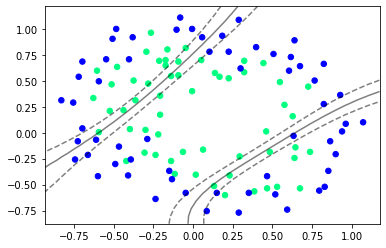

------------------------------
accuracy_score : 0.4830508474576271
f1_score       : 0.48739495798319327
r2_score       : -1.0701754385964897
smape          : 103.38983050847457
------------------------------
CPU times: user 48.8 s, sys: 441 ms, total: 49.2 s
Wall time: 50.1 s


In [22]:
%%time
grid_cv.fit(X1, Y1)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X1, Y1)

0.6351351351351351
{'C': 0.4, 'coef0': 0.8, 'kernel': 'sigmoid'}


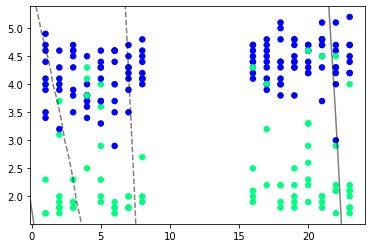

------------------------------
accuracy_score : 0.581081081081081
f1_score       : 0.16216216216216217
r2_score       : -3.5108149442866505
smape          : 83.78378378378379
------------------------------
CPU times: user 1min 31s, sys: 1.05 s, total: 1min 32s
Wall time: 1min 52s


In [23]:
%%time
grid_cv.fit(X2, Y2)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X2, Y2)

## NuSVC

In [24]:
from sklearn.svm import NuSVC
grid_param = {
    "nu": np.arange(0.1, 1.1, 0.1),
    "kernel": ["rbf"],
}
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='macro') #weighted
grid_cv = model_selection.GridSearchCV(
    NuSVC(),
    grid_param,
    n_jobs=-1,
    scoring=scorer,
    cv=LeaveOneOut())

0.8220338983050848
{'kernel': 'rbf', 'nu': 0.4}


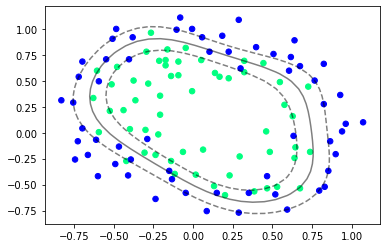

------------------------------
accuracy_score : 0.8389830508474576
f1_score       : 0.8403361344537814
r2_score       : 0.3551912568306014
smape          : 32.20338983050847
------------------------------
CPU times: user 1.46 s, sys: 96.4 ms, total: 1.55 s
Wall time: 1.38 s


In [25]:
%%time
grid_cv.fit(X1, Y1)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X1, Y1)

0.9009009009009009
{'kernel': 'rbf', 'nu': 0.30000000000000004}


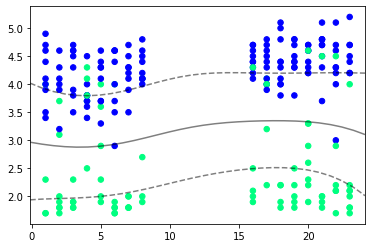

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8607594936708862
r2_score       : 0.5409774436090227
smape          : 19.81981981981982
------------------------------
CPU times: user 2.3 s, sys: 145 ms, total: 2.45 s
Wall time: 2.58 s


In [26]:
%%time
grid_cv.fit(X2, Y2)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
plot_svc_with_errors(grid_cv.best_estimator_, X2, Y2)